In [1]:
import numpy as np

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [82]:
file = np.loadtxt(open("data/safeway/report.csv", "rb"), delimiter=",")
# Sort data low-to-high based on risk factor
file_sorted = file[file[:,0].argsort()]
# Split the features from the labels
data = file_sorted[:,1:] # Features
labels = file_sorted[:,0] # Labels

# Assign data to bins. Used for coloring plots or classification
# Since data is sorted, we can uniformly assign colors
colors = np.empty(991, dtype='object')
colors[0:199] = "#30CF58"
colors[199:398] = "#61CF30"
colors[398:597] = "#DFDC20"
colors[597:796] = "#FF6800"
colors[796:] = "#FF0000"
# Markers
markers = np.empty(991, dtype='object')
markers[0:199] = "o"
markers[199:398] = "^"
markers[398:597] = "s"
markers[597:796] = "d"
markers[796:] = "*"

print(data.shape)
print(labels.shape)

(991, 28)
(991,)


In [3]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=15)

# Linear regression on whole dataset
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)
R2 = r2_score(y_test, predicted)

print("Linear Regression Results")
print("Mean squared error: %.2f" % MSE)
print("Mean absolute error: %.2f" % MAE)
print('Coefficient of determination: %.2f' % R2)

Linear Regression Results
Mean squared error: 1.68
Mean absolute error: 0.84
Coefficient of determination: 0.22


In [4]:
# Run PCA on data to reduce to 2 components
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(data_pca, labels, test_size=0.1, random_state=15)

# Train Linear Regression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)
R2 = r2_score(y_test, predicted)

print("Linear Regression Results with PCA")
print("Mean squared error: %.2f" % MSE)
print("Mean absolute error: %.2f" % MAE)
print('Coefficient of determination: %.2f' % R2)

Linear Regression Results with PCA
Mean squared error: 1.98
Mean absolute error: 1.15
Coefficient of determination: 0.09


In [6]:
# Univariate Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

data_kbest = SelectKBest(mutual_info_regression, k=2).fit_transform(data, labels)

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(data_kbest, labels, test_size=0.1, random_state=15)

# Train Linear Regression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)
R2 = r2_score(y_test, predicted)

print("Linear Regression Results with k-Best Feature Selection")
print("Mean squared error: %.2f" % MSE)
print("Mean absolute error: %.2f" % MAE)
print('Coefficient of determination: %.2f' % R2)

Linear Regression Results with k-Best Feature Selection
Mean squared error: 1.88
Mean absolute error: 1.11
Coefficient of determination: 0.13


In [8]:
from sklearn.feature_selection import RFE, RFECV

# Recursive feature elimination
model = linear_model.LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(data, labels)
print(rfe.ranking_)
print(rfe.ranking_.shape)

[28 25 26  8 19  3 21 16  4  1 17 12 23 11 20  7  9 18 24 15 13 27  2 22  5
 14 10  6]
(28,)


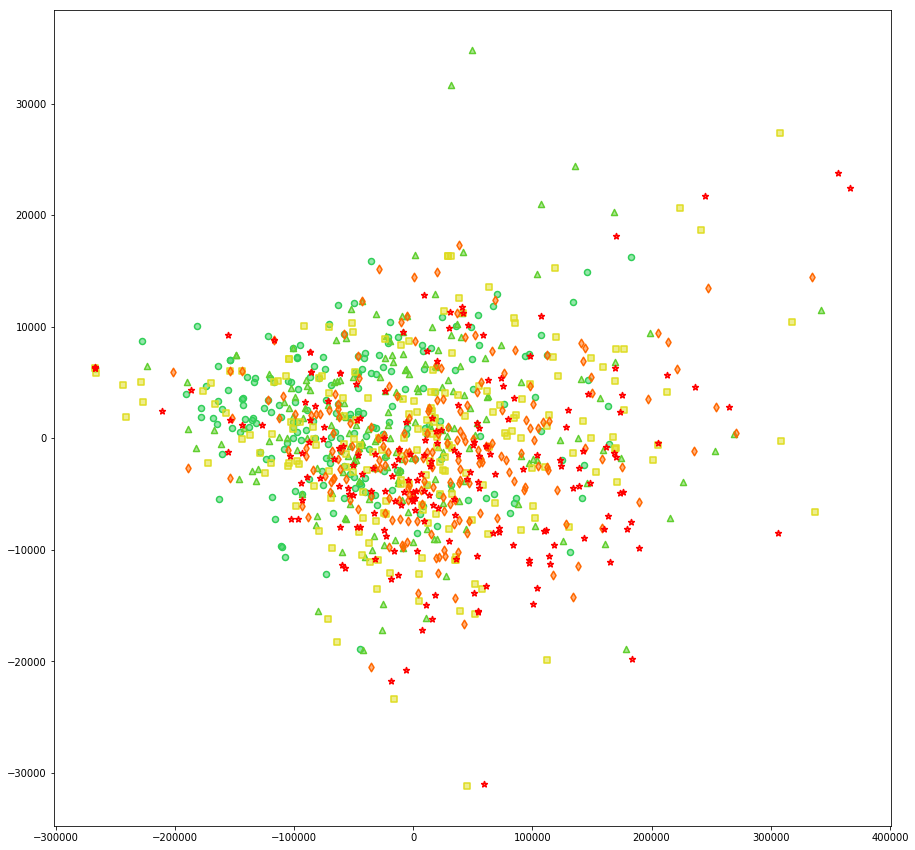

In [83]:
# Plot PCA points
from matplotlib.colors import to_rgba
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
for i in range(991):
    plt.scatter(data_pca[i,0],data_pca[i,1], marker=markers[i], c=to_rgba(colors[i],0.5), edgecolor=colors[i], linewidth='1.5')
plt.show()

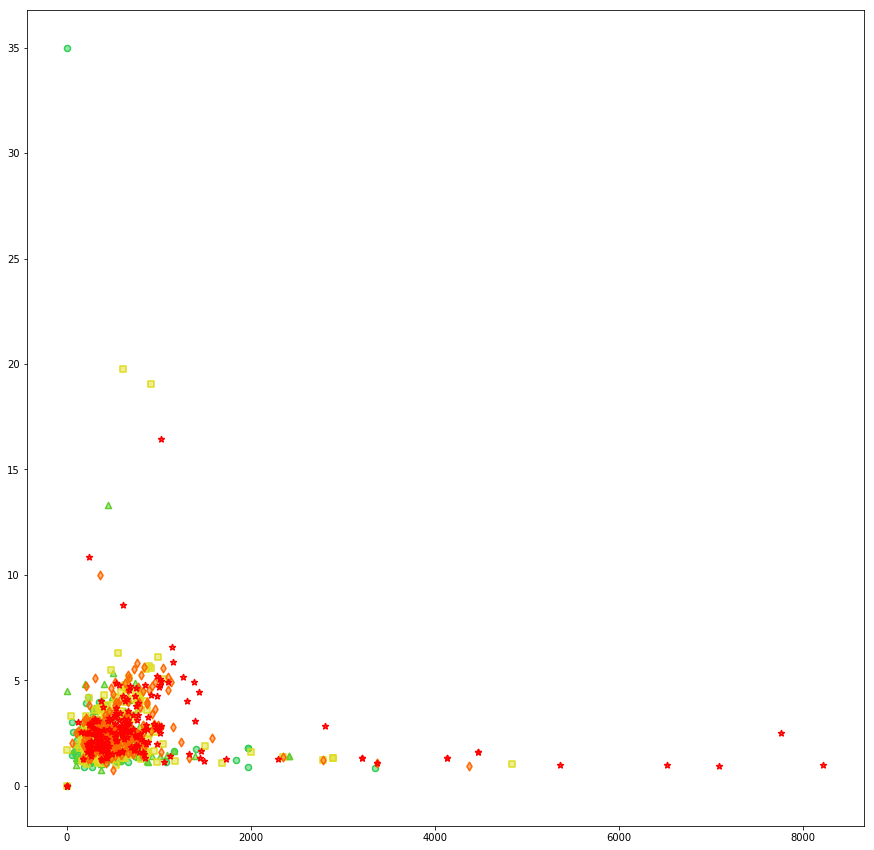

In [85]:
# Plot k-Best Feature Selection results with k=2
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(15,15))
for i in range(991):
    plt.scatter(data_kbest[i,0],data_kbest[i,1], marker=markers[i], c=to_rgba(colors[i],0.5), edgecolor=colors[i], linewidth='1.5')
plt.show()